In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mrcnn.config
import mrcnn.visualize
import mrcnn.utils
from mrcnn.model import MaskRCNN
from pathlib import Path


def segment_people(image, masks, class_ids):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    masked = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    
    # Loop over each detected object's mask
    for i in range(masks.shape[2]):
        # If the detected object isn't a person (class_id == 1), skip it
        if class_ids[i] != 1:
            continue

        # Draw the mask for the current object in white
        mask = masks[:, :, i]
#         color = tuple(np.random.randint(256, size=3))
        color = (18, 255, 255)
        masked = mrcnn.visualize.apply_mask(masked, mask, color=color, alpha=1.0)

    return masked.astype(np.uint8)


# Configuration that will be used by the Mask-RCNN library
class MaskRCNNConfig(mrcnn.config.Config):
    NAME = "coco_pretrained_model_config"
    IMAGES_PER_GPU = 1
    GPU_COUNT = 1
    NUM_CLASSES = 1 + 80  # COCO dataset has 80 classes + one background class

Using TensorFlow backend.


In [2]:
# Root directory of the project
ROOT_DIR = Path(".")

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    mrcnn.utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# Create a Mask-RCNN model in inference mode
model = MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=MaskRCNNConfig())

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [3]:
# Load pre-trained model
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [5]:
def rescale_frame(frame, percent=75):

    width = int(frame.shape[1] * percent / 100)
    height = int(frame.shape[0] * percent / 100)
    dim = (width, height)
    
    return cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)

In [28]:
%%time
input_video = 'input_video.MOV'
capture = cv2.VideoCapture(input_video)
fps = 25.0
width = int(capture.get(3))
height = int(capture.get(4))
fcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')

# ret, first_frame = capture.read()
# first_frame = rescale_frame(first_frame, percent=50)
out = cv2.VideoWriter("new_video3.avi", fcc, fps, (960, 540))

while True:
    ret, frame = capture.read()
    if not ret:
        break
        
    frame = rescale_frame(frame, percent=50)
    results = model.detect([frame], verbose=0)
    r = results[0]
    masked_frame = segment_people(frame, r['masks'], r['class_ids'])
#     cv2.imshow('video', masked_frame)
#     print("okay")
    # Recording Video
    out.write(masked_frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

capture.release()
# cv2.destroyAllWindows()


okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay


okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay


Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/home/Vlad/BARIS/topic-modeling/newenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


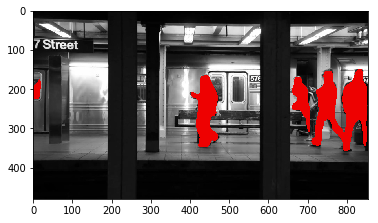

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


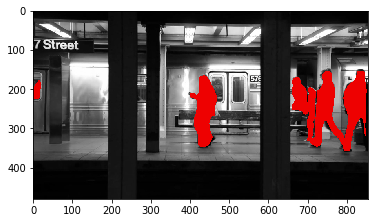

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


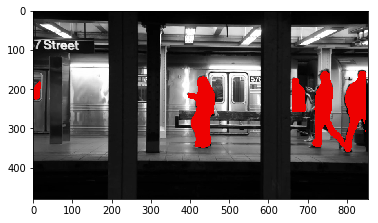

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


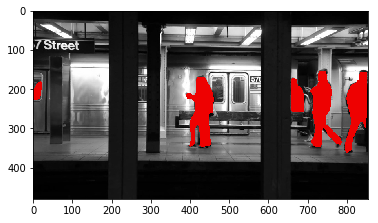

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


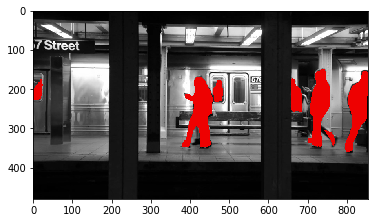

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


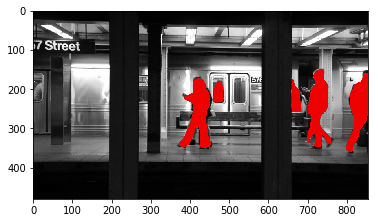

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


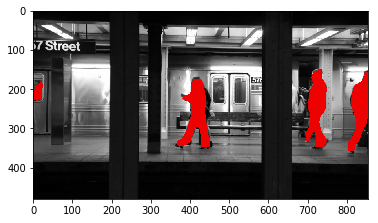

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


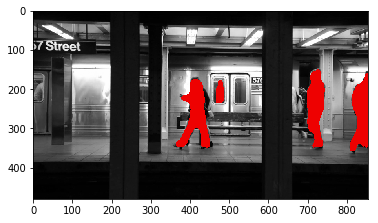

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


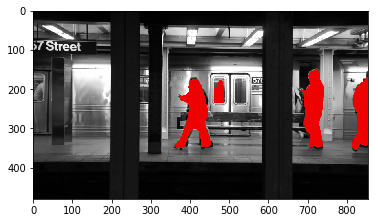

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


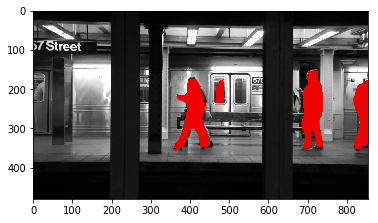

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


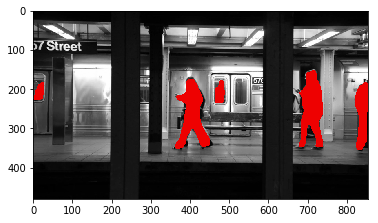

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


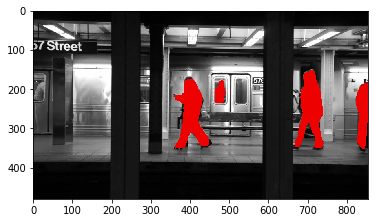

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


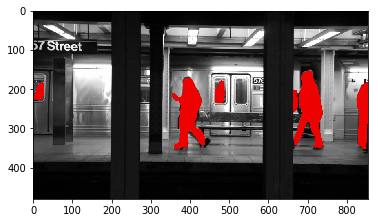

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [ ]:
%%time
for i in range(0, 88):

    filename = str(i).zfill(5) + ".jpg"
    # Load the image we want to run detection on
    image_path = str(ROOT_DIR / "DAVIS" / "JPEGImages" / "480p" / "subway" / filename)
    image = cv2.imread(image_path)

    # Convert the image from BGR color (which OpenCV uses) to RGB color
    rgb_image = image[:, :, ::-1]

    # Run the image through the model
    results = model.detect([rgb_image], verbose=1)
    # print(i)
    # Visualize results
    r = results[0]
    masked_image = segment_people(rgb_image, r['masks'], r['class_ids'])

    # Show the result on the screen
    plt.imshow(masked_image.astype(np.uint8))
    plt.show()
    # cv2.imwrite("output/" + filename, masked_image)
